# News Classification - Data Exploration

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

save_figures = False
figure_dir = '../results/figures/'

In [2]:
df = pd.read_csv('../data/development.csv', index_col='Id')
print('------ DATASET PREVIEW ------')
df.head()

,source,title,article,page_rank,timestamp,label
Id,,,,,,
0,AllAfrica.com,OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd,THE Organisation of Petroleum Exporting Countr...,5,2004-09-16 22:39:53,5
1,Xinhua,Yearender: Mideast peace roadmap reaches dead-...,Looking back at the major events that took pla...,5,2004-12-17 19:01:14,0
2,Yahoo,Battleground Dispatches for Oct. 5 \\n (CQP...,CQPolitics.com - Here are today's Battleground...,5,2006-10-05 18:42:29,0
3,BBC,Air best to resuscitate newborns,Air rather than oxygen should be used to resus...,5,0000-00-00 00:00:00,0
4,Yahoo,High tech German train crash kills at least on...,"<p><a href=""http://us.rd.yahoo.com/dailynews/r...",5,2006-09-22 17:28:57,0


In [3]:
print('------ DATASET INFO ------')
df.info()
# Basic statistics
print("\nMissing values:")
print(df.isna().sum())
print("\nBasic statistics:")
print(df.describe())

------ DATASET INFO ------
<class 'pandas.core.frame.DataFrame'>
Index: 79997 entries, 0 to 79996
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     79997 non-null  object
 1   title      79996 non-null  object
 2   article    79996 non-null  object
 3   page_rank  79997 non-null  int64 
 4   timestamp  79997 non-null  object
 5   label      79997 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.3+ MB

Missing values:
source       0
title        1
article      1
page_rank    0
timestamp    0
label        0
dtype: int64

Basic statistics:
          page_rank         label
count  79997.000000  79997.000000
mean       4.892958      2.262760
std        0.397603      1.970502
min        2.000000      0.000000
25%        5.000000      0.000000
50%        5.000000      2.000000
75%        5.000000      4.000000
max        5.000000      6.000000


## 1. Class distribution analysis

In [4]:
# Class distribution
class_counts = df['label'].value_counts().sort_index()
print("Class distribution:")
print(class_counts)
print(f"\nTotal samples: {len(df)}")
print(f"\nClass percentages:")
print((class_counts / len(df) * 100).round(2))

Class distribution:
label
0    23542
1    10588
2    11161
3     9977
4     8574
5    13053
6     3102
Name: count, dtype: int64

Total samples: 79997

Class percentages:
label
0    29.43
1    13.24
2    13.95
3    12.47
4    10.72
5    16.32
6     3.88
Name: count, dtype: float64


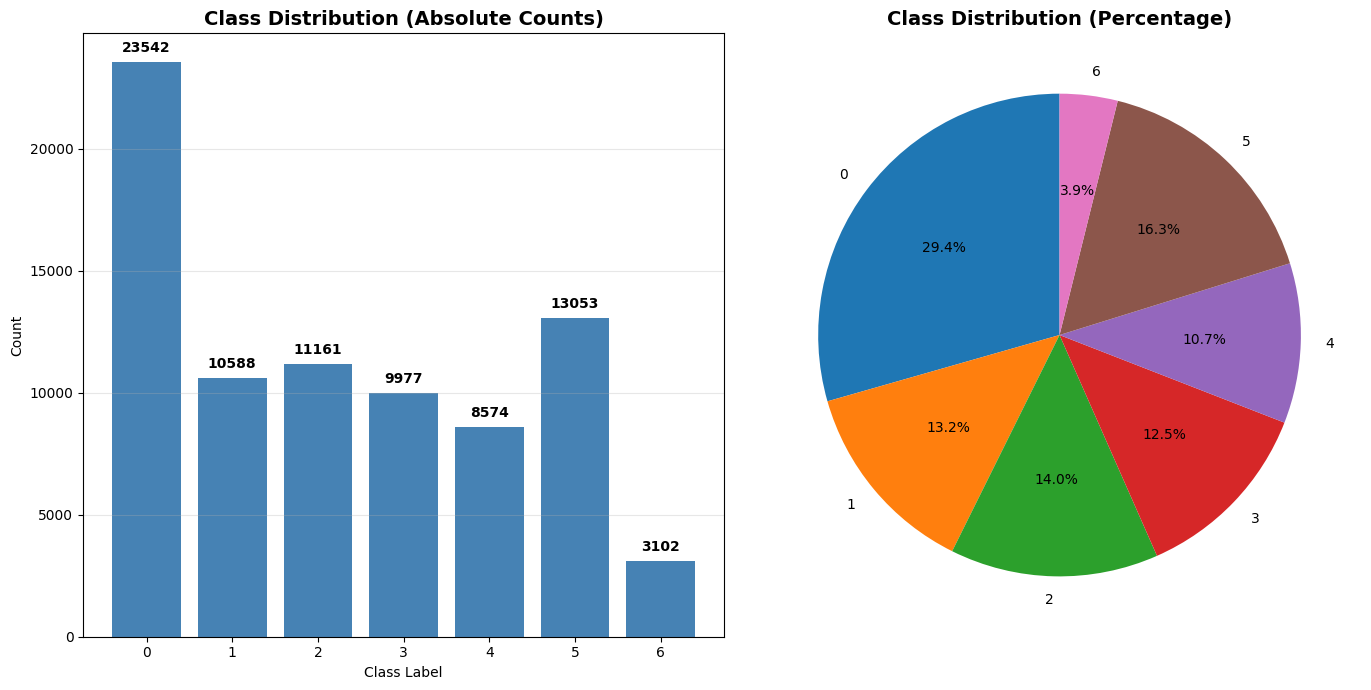

In [5]:
# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Bar plot
axes[0].bar(class_counts.index, class_counts, color='steelblue')
axes[0].set_title('Class Distribution (Absolute Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(class_counts):
    axes[0].text(i, v + 300, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

fig.tight_layout()
if save_figures:
    fig.savefig((figure_dir + 'class_distribution.png'), dpi=300, bbox_inches='tight')

# Imbalance ratio
max_class = class_counts.max()
min_class = class_counts.min()
print(f"\nMax imbalance ratio (max/min): {max_class/min_class:.2f}")
print(f"Majority class (0): {class_counts[0]} samples ({class_counts[0]/len(df)*100:.1f}%)")
print(f"Minority class (6): {class_counts[6]} samples ({class_counts[6]/len(df)*100:.1f}%)")

## 2. Text length analysis

In [6]:
# Calculate text lengths
df['title_len'] = df['title'].fillna('').str.len()
df['title_nwords'] = df['title'].fillna('').str.split().str.len()
df['article_len'] = df['article'].fillna('').str.len()
df['article_nwords'] = df['article'].fillna('').str.split().str.len()

print("Title statistics:")
print(df[['title_len', 'title_nwords']].describe())
print("\nArticle statistics:")
print(df[['article_len', 'article_nwords']].describe())

Title statistics:
          title_len  title_nwords
count  79997.000000  79997.000000
mean      43.765141      6.994175
std       14.133442      2.256556
min        0.000000      0.000000
25%       33.000000      5.000000
50%       43.000000      7.000000
75%       51.000000      8.000000
max      255.000000     45.000000

Article statistics:
        article_len  article_nwords
count  79997.000000    79997.000000
mean     273.152431       35.769879
std      352.797158       39.438934
min        0.000000        0.000000
25%      140.000000       22.000000
50%      192.000000       30.000000
75%      239.000000       38.000000
max    15790.000000     1888.000000


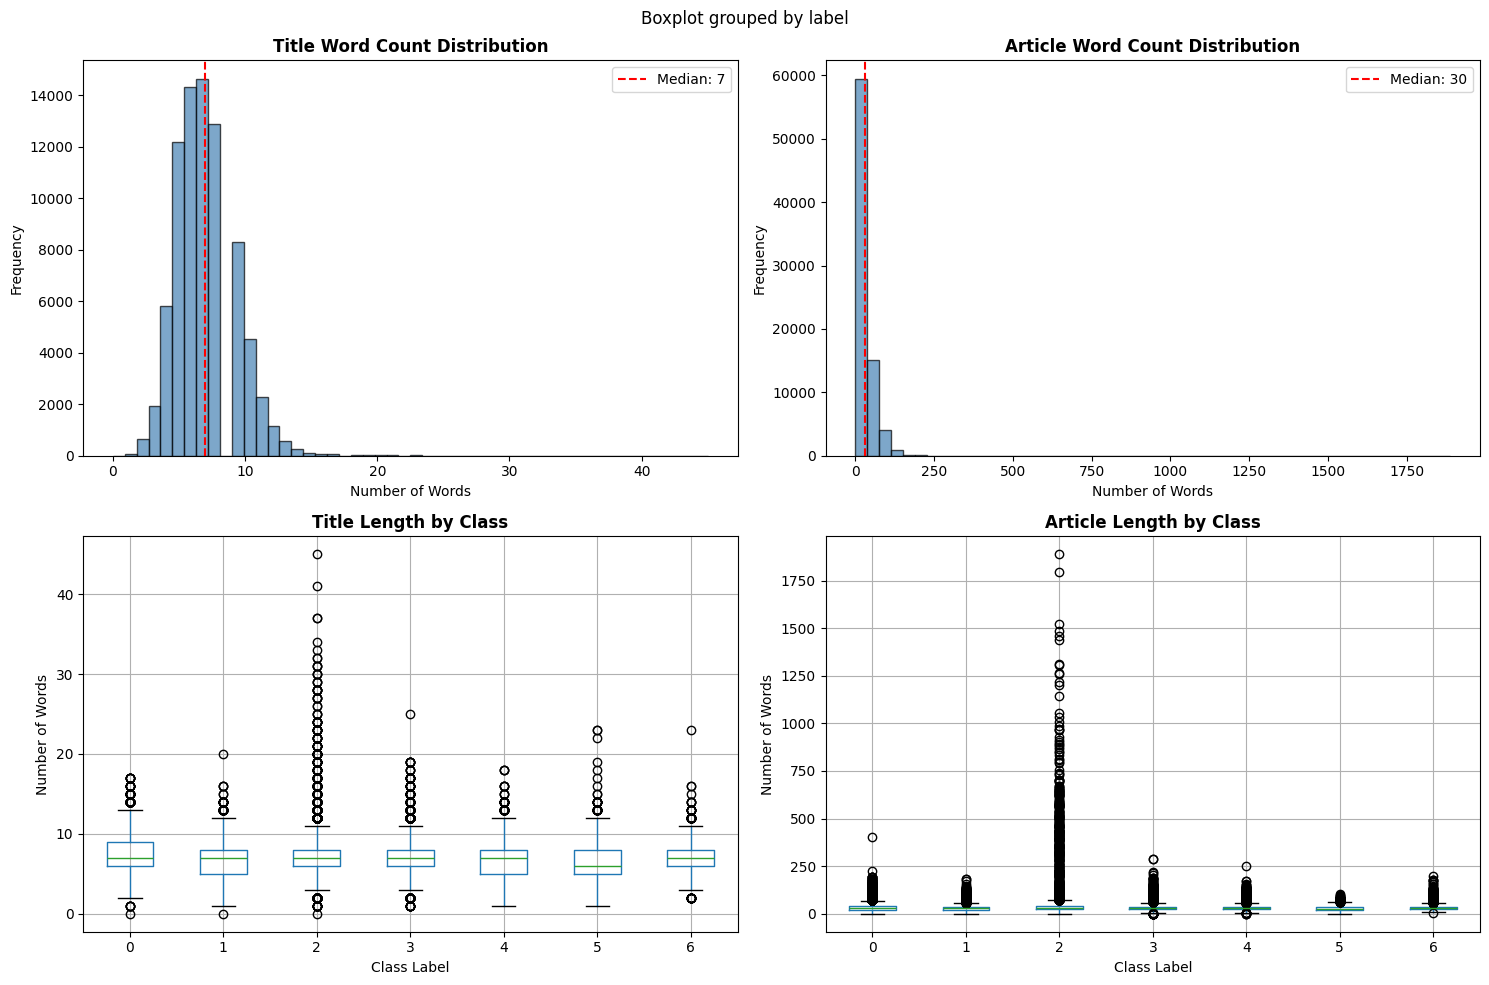

In [7]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Title word count
axes[0].hist(df['title_nwords'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Title Word Count Distribution', fontweight='bold')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['title_nwords'].median(), color='red', linestyle='--', label=f'Median: {df["title_nwords"].median():.0f}')
axes[0].legend()

# Article word count
axes[1].hist(df['article_nwords'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Article Word Count Distribution', fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['article_nwords'].median(), color='red', linestyle='--', label=f'Median: {df["article_nwords"].median():.0f}')
axes[1].legend()

# Title words by class
df.boxplot(column='title_nwords', by='label', ax=axes[2])
axes[2].set_title('Title Length by Class', fontweight='bold')
axes[2].set_xlabel('Class Label')
axes[2].set_ylabel('Number of Words')

# Article words by class
df.boxplot(column='article_nwords', by='label', ax=axes[3])
axes[3].set_title('Article Length by Class', fontweight='bold')
axes[3].set_xlabel('Class Label')
axes[3].set_ylabel('Number of Words')

fig.tight_layout()
if save_figures:
    plt.savefig((figure_dir + 'text_length_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

## 3. Metadata analysis

In [8]:
# Source analysis
print("Source distribution:")
source_counts = df['source'].value_counts()
print(f"Number of unique sources: {len(source_counts)}")
print(f"\nTop 30 sources:")
print(source_counts.head(30))

Source distribution:
Number of unique sources: 1359

Top 30 sources:
source
Yahoo            15850
Reuters          11915
BBC               7971
New               6430
Washington        3383
RedNova           2701
Boston            1807
CNN               1802
CNET              1369
Topix.Net         1331
Guardian          1011
Motley             931
Register           834
International      756
Forbes             720
Time               694
ABC                590
InfoWorld          554
San                540
Wired              524
Xinhua             492
Computerworld      465
News               441
CSMonitor          426
PCWorld            409
Bloomberg          407
Seattle            364
Ananova            318
\N                 294
Syfy.com           281
Name: count, dtype: int64


In [9]:
c = list(source_counts.index[source_counts.index.str.len() < 5 ])
print(c)
print('\\N' in c)
print('\\' in c)


['BBC', 'New', 'CNN', 'CNET', 'Time', 'ABC', 'San', 'News', '\\N', 'USA', 'CBS', 'CBC', 'ESPN', 'BCC', 'CTV', 'PC', 'ic', 'RTE', 'NPR', 'IPS', 'Age', 'Gulf', 'FOX', 'Fox', 'Big', 'Sify', 'AZ', 'KESQ', 'St.', '\\', 'Palm', 'Fort', 'Los', 'Salt', '580', 'Sun', 'Hi', 'WTNH', 'CJAD', 'CRN', 'MSN', 'WIS', 'CIO', 'Cool', 'Arab', 'Lex', 'Las', 'NBC', 'E!', 'NASA', 'Team', 'KLTV', 'ABS', 'WQAD', 'WAFF', 'CBBC', 'Mac', 'KOTV', 'Quad', 'ISN', 'GEO', 'MTV', 'RCR', 'Asia', 'Free', 'SABC', 'Viet', 'KVIA', 'CRM', 'WBOC', 'TVNZ', 'WPVI', 'NFL', 'TIME', 'WJLA', 'KFVS', 'WANE', 'WMTW', 'WATE', 'Home', 'El', 'Red', 'KABC', 'WHNT', 'Baku', 'WBEX', 'DM', 'WLS', 'WTVO', 'DV', 'WJXX', 'WDRB', 'WCAX', 'Ars', 'WISC', 'Film', 'Web', 'KTOK', 'AINA', 'UK', 'WKRN', 'Long', 'Sky', 'KWTX', 'CIOL', 'ENT', 'WXXA', 'Net', 'Dar', 'WCCO', 'East', 'RIA', 'WTEV', 'Tech', 'KTRE', 'WBAY', 'WMUR', 'AMIN', 'IGN', 'KCAU', 'U.TV', 'AME', 'WPBF', 'Wise', 'BET', 'Day', 'Town', 'WTHR', 'Lawn', 'KLAS', 'EE', 'WGAL', 'NZ', 'Lodi', '

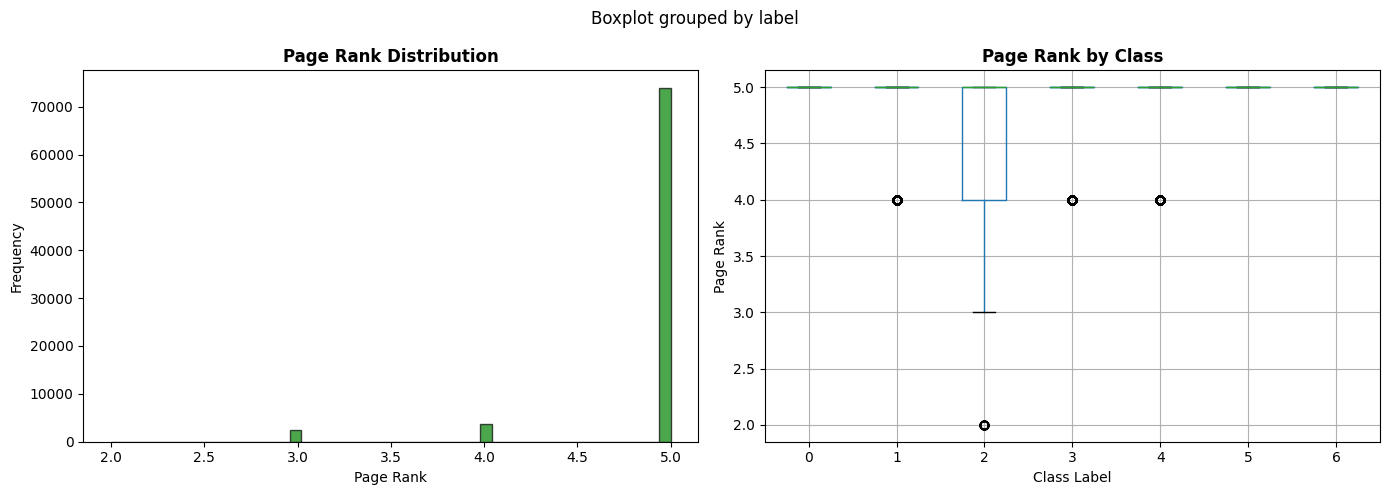

In [10]:
# Page rank analysis
print("Page rank statistics:")
print(df['page_rank'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Page rank distribution
axes[0].hist(df['page_rank'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title('Page Rank Distribution', fontweight='bold')
axes[0].set_xlabel('Page Rank')
axes[0].set_ylabel('Frequency')

# Page rank by class
df.boxplot(column='page_rank', by='label', ax=axes[1])
axes[1].set_title('Page Rank by Class', fontweight='bold')
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Page Rank')

fig.tight_layout()
if save_figures:
    plt.savefig((figure_dir + 'page_rank_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Timestamp analysis
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp_dt'].dt.hour
df['day_of_week'] = df['timestamp_dt'].dt.dayofweek
df['month'] = df['timestamp_dt'].dt.month

print("Timestamp range:")
print(f"From: {df['timestamp_dt'].min()}")
print(f"To: {df['timestamp_dt'].max()}")
print(f"Span: {(df['timestamp_dt'].max() - df['timestamp_dt'].min()).days} days")

Timestamp range:
From: 2004-08-18 02:45:46
To: 2008-02-20 21:52:30
Span: 1281 days


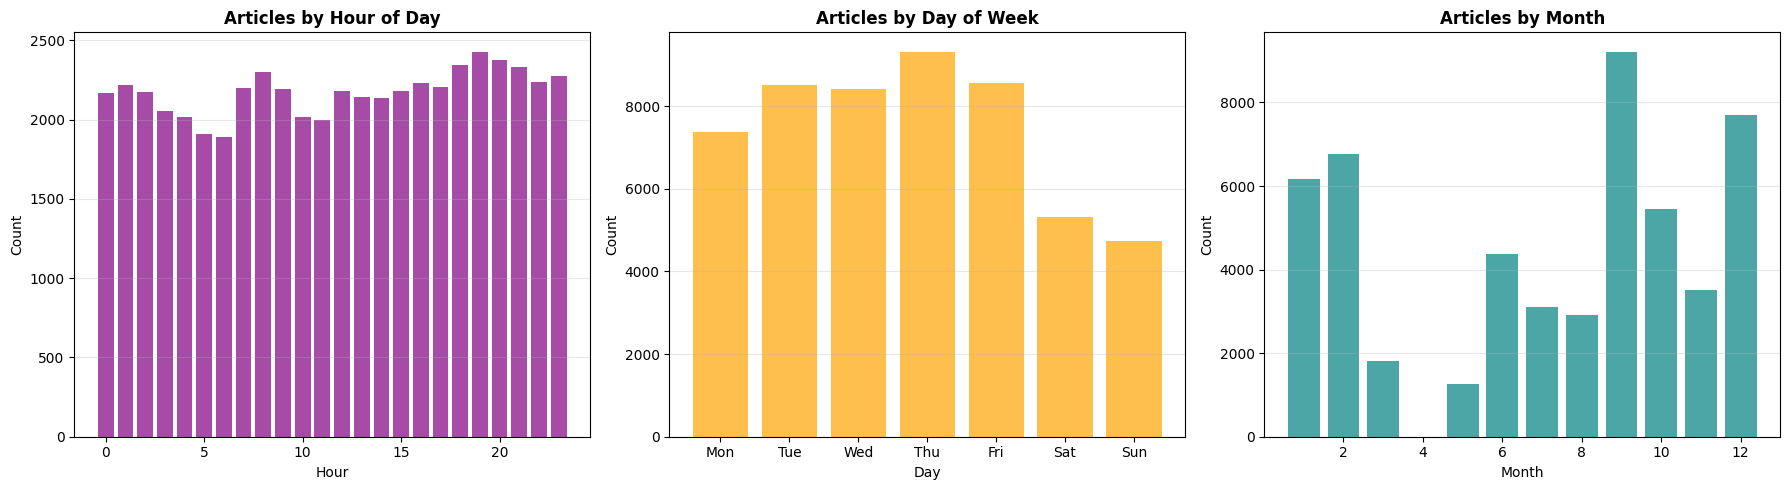

In [12]:
#  Whole dataset temporal patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Articles by hour
hour_counts = df['hour'].value_counts().sort_index()
axes[0].bar(hour_counts.index, hour_counts.values, color='purple', alpha=0.7)
axes[0].set_title('Articles by Hour of Day', fontweight='bold')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Articles by day of week
dow_counts = df['day_of_week'].value_counts().sort_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='orange', alpha=0.7)
axes[1].set_title('Articles by Day of Week', fontweight='bold')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(7),
                   labels=dow_labels)
axes[1].grid(axis='y', alpha=0.3)

# Articles by month
month_counts = df['month'].value_counts().sort_index()
axes[2].bar(month_counts.index, month_counts.values, color='teal', alpha=0.7)
axes[2].set_title('Articles by Month', fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')
axes[2].grid(axis='y', alpha=0.3)

fig.tight_layout()
if save_figures:
    plt.savefig((figure_dir + 'temporal_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

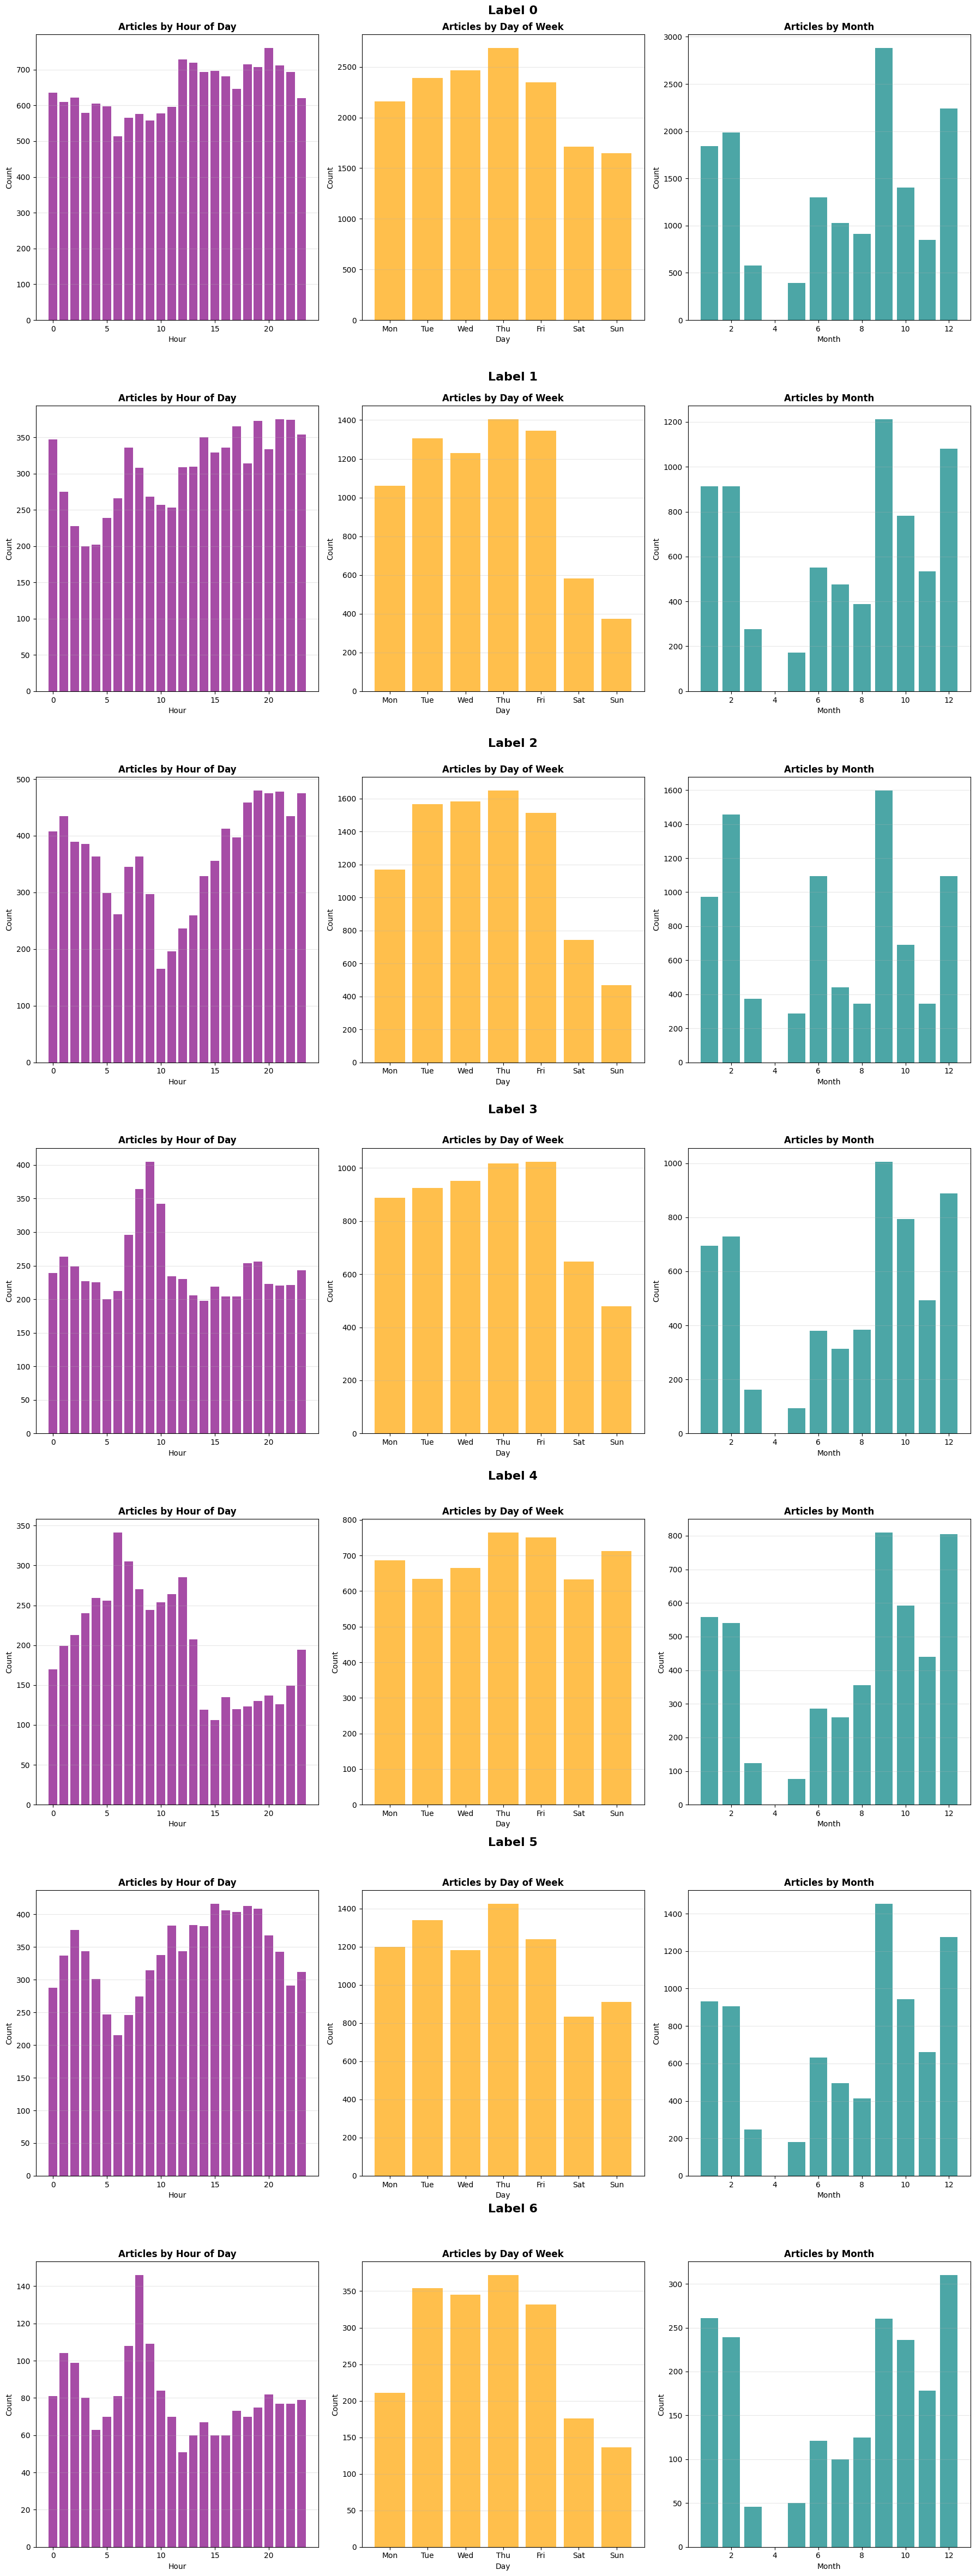

In [13]:
#  Temporal patterns by label
unique_labels = sorted(df['label'].unique())
n_labels = len(unique_labels)

fig, axes = plt.subplots(n_labels, 3, figsize=(18, (5+2)*n_labels))
axes = axes.flatten()

for i, label in enumerate(unique_labels):
    df_label = df[df['label']==label]

    # Articles by hour
    hour_counts = df_label['hour'].value_counts().sort_index()
    axes[3*i].bar(hour_counts.index, hour_counts.values, color='purple', alpha=0.7)
    axes[3*i].set_title('Articles by Hour of Day', fontweight='bold')
    axes[3*i].set_xlabel('Hour')
    axes[3*i].set_ylabel('Count')
    axes[3*i].grid(axis='y', alpha=0.3)

    # Articles by day of week
    dow_counts = df_label['day_of_week'].value_counts().sort_index()
    dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axes[3*i+1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='orange', alpha=0.7)
    axes[3*i+1].set_title('Articles by Day of Week', fontweight='bold')
    axes[3*i+1].set_xlabel('Day')
    axes[3*i+1].set_ylabel('Count')
    axes[3*i+1].set_xticks(range(7),
                       labels=dow_labels)
    axes[3*i+1].grid(axis='y', alpha=0.3)

    # Articles by month
    month_counts = df_label['month'].value_counts().sort_index()
    axes[3*i+2].bar(month_counts.index, month_counts.values, color='teal', alpha=0.7)
    axes[3*i+2].set_title('Articles by Month', fontweight='bold')
    axes[3*i+2].set_xlabel('Month')
    axes[3*i+2].set_ylabel('Count')
    axes[3*i+2].grid(axis='y', alpha=0.3)

    # # Row title
    fig.text(
            0.5,
            0.96-i*0.96/7,
            f'Label {i}',

            fontsize=16,
            fontweight='bold'
        )


fig.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
fig.subplots_adjust(hspace=0.3)
if save_figures:
    plt.savefig((figure_dir + 'temporal_analysis_per_label.png'), dpi=300, bbox_inches='tight')
plt.show()

## 4. Source-Label relationship

In [14]:
# Cross-tabulation: source vs class
source_class = pd.crosstab(df['source'], df['label'])
print("Sources by class distribution:")
print(source_class.head(10))

# Calculate source-class entropy
source_entropy = []
for source in source_counts.head(20).index:
    source_df = df[df['source'] == source]
    class_dist = source_df['label'].value_counts(normalize=True)
    entropy = -np.sum(class_dist * np.log2(class_dist + 1e-10))
    source_entropy.append({'source': source, 'entropy': entropy, 'count': len(source_df)})

source_entropy_df = pd.DataFrame(source_entropy).sort_values('entropy', ascending=False)
print("\nSource entropy (higher = more diverse classes):")
print(source_entropy_df.head(10))

Sources by class distribution:
label           0  1  2   3  4  5  6
source                              
123Bharath.com  1  0  0   0  2  3  1
2TheAdvocate    0  0  0   0  1  0  0
365Gay.com      0  0  0   1  0  2  1
4TheGame        0  0  0   0  1  0  0
4ni.co.uk       2  1  1   0  0  2  1
580             6  0  0  10  2  4  3
7Online.com     0  0  0   3  0  4  1
94Country       0  0  0   1  0  0  0
9NEWS.com       0  0  0   1  0  1  0
AARP            0  0  0   0  0  0  1

Source entropy (higher = more diverse classes):
           source   entropy  count
3             New  2.639882   6430
4      Washington  2.577121   3383
1         Reuters  2.491960  11915
16            ABC  2.411228    590
18            San  2.183368    540
0           Yahoo  2.034239  15850
6          Boston  2.020152   1807
2             BBC  1.775250   7971
15           Time  1.530302    694
13  International  1.450562    756


## 5. Text analysis

In [15]:
# Sample text analysis
def analyze_text_sample(text_series, name='Text', n_show=15):
    texts = text_series.fillna('').astype(str)

    # Character-level stats
    total_chars = texts.str.len().sum()
    avg_chars = texts.str.len().mean()

    # Word-level stats
    all_words = ' '.join(texts).lower().split()
    unique_words = len(set(all_words))
    total_words = len(all_words)

    # Most common words
    word_freq = Counter(all_words)

    print(f"\n{name} Analysis:")
    print(f"Total characters: {total_chars:,}")
    print(f"Average characters per {name.lower()}: {avg_chars:.1f}")
    print(f"Total words: {total_words:,}")
    print(f"Unique words: {unique_words:,}")
    print(f"Vocabulary richness: {unique_words/total_words:.4f}")
    print(f"\nTop {n_show} most common words:")
    for word, count in word_freq.most_common(n_show):
        print(f"  {word}: {count:,}")

    return word_freq

title_freq = analyze_text_sample(df['title'], 'Title')
article_freq = analyze_text_sample(df['article'], 'Article')


Article Analysis:
Total characters: 21,851,375
Average characters per article: 273.2
Total words: 2,861,483
Unique words: 187,709
Vocabulary richness: 0.0656

Top 15 most common words:
  the: 138,025
  a: 78,688
  to: 67,653
  of: 67,567
  in: 62,501
  and: 47,709
  on: 36,941
  -: 31,690
  for: 27,149
  that: 18,911
  with: 16,396
  is: 16,135
  at: 15,975
  as: 14,999
  by: 14,262


In [16]:
# Check for special characters and patterns
def check_text_patterns(df_column, name='Text'):
    texts = df_column.fillna('').astype(str)

    url_pattern = r'(https?://\S+|https?|\bwww\.\S+)'
    email_pattern = r'\S+@\S+'

    has_url = texts.str.contains(url_pattern, regex=True).sum()
    has_email = texts.str.contains(email_pattern, regex=True).sum()
    has_digits = texts.str.contains(r'\d', regex=True).sum()
    has_special = texts.str.contains(r'[^a-zA-Z0-9\s]', regex=True).sum()

    print(f"\n{name} Patterns:")
    print(f"Contains URLs: {has_url} ({has_url/len(texts)*100:.1f}%)")
    print(f"Contains emails: {has_email} ({has_email/len(texts)*100:.1f}%)")
    print(f"Contains digits: {has_digits} ({has_digits/len(texts)*100:.1f}%)")
    print(f"Contains special chars: {has_special} ({has_special/len(texts)*100:.1f}%)")

check_text_patterns(df['title'], 'Title')
check_text_patterns(df['article'], 'Article')


Article Patterns:
Contains URLs: 12442 (15.6%)
Contains emails: 28 (0.0%)
Contains digits: 40124 (50.2%)
Contains special chars: 79607 (99.5%)


## Stats summary

In [18]:
print("="*80)
print("SUMMARY")
print("="*80)

print("\n1. CLASS IMBALANCE:")
print(f"   - Imbalance ratio: {class_counts.max()/class_counts.min():.2f}x")

print("\n2. TEXT LENGTH:")
print(f"   - Median title words: {df['title_nwords'].median():.0f}")
print(f"   - Median article words: {df['article_nwords'].median():.0f}")

print("\n3. METADATA FEATURES:")
print(f"   - Unique sources: {df['source'].nunique()}")
print(f"   - Page rank range: [{df['page_rank'].min():.2f}, {df['page_rank'].max():.2f}]")

print("\n4. VOCABULARY:")
all_text = df['title'].fillna('') + ' ' + df['article'].fillna('')
vocab_size = len(set(' '.join(all_text).lower().split()))
print(f"   - Approximate vocabulary size: {vocab_size:,}")

   - Approximate vocabulary size: 207,547
